# 1. PCA 실습

### 1)  wine data를 불러오고 스케일링을 하세요.

In [27]:
from sklearn.datasets import load_wine

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


In [41]:
wine = load_wine()

In [42]:
wine_scaled = StandardScaler().fit_transform(wine.data)
wine_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### 2) 스케일링된 데이터에 주성분 수 7로 설정해서 PCA 데이터로 변환하고 개별 주성분이 차지하는 변동성 비율을 출력하세요

In [43]:
pca=PCA(n_components=7)

pca=pca.fit(wine_scaled)
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679]


In [44]:
wine_pca=pca.transform(wine_scaled)
wine_pca

array([[ 3.31675081, -1.44346263, -0.16573904, ...,  0.69304284,
        -0.22388013,  0.59642655],
       [ 2.20946492,  0.33339289, -2.02645737, ..., -0.25765463,
        -0.92712024,  0.05377561],
       [ 2.51674015, -1.0311513 ,  0.98281867, ..., -0.25103312,
         0.54927605,  0.42420545],
       ...,
       [-2.67783946, -2.76089913, -0.94094188, ...,  1.271355  ,
         0.27306792,  0.67923541],
       [-2.38701709, -2.29734668, -0.5506962 , ...,  0.81395522,
         1.17878298,  0.63397527],
       [-3.20875816, -2.76891957,  1.01391366, ..., -0.89519259,
         0.29609218,  0.00574126]])

### 3) 원본 와인 데이터세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 출력하세요.
####    - 분류기는 RandomFoestClassifier를 사용하세요
####    - 교차 검증 폴드수 : 3
####    - 출력 결과는
       원본 데이터 평균 정확도 : [0.xxx,0.xxx,0.xxx]
       PCA 변환 데이터 평균 정확도 : [0.xxx,0.xxx,0.xxx]

In [53]:
rcf=RandomForestClassifier(random_state=156)

In [370]:

scores = cross_val_score(rcf,wine.data,wine.target,scoring='accuracy',cv=3)
print('원본 데이터 평균 정확도 :{0:.4f} '.format(np.mean(scores)), '\n', scores)

원본 데이터 평균 정확도 :0.9165  
 [0.86666667 0.9        0.98275862]


C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [50]:


pca_columns=['comp1','comp2','comp3','comp4','comp5','comp6','comp7']
wineDF_pca = pd.DataFrame(wine_pca,columns=pca_columns)
#wineDF_pca['target']=wine.target
wineDF_pca.head()

,comp1,comp2,comp3,comp4,comp5,comp6,comp7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074


In [371]:

scores_pca = cross_val_score(rcf,wineDF_pca,wine.target,scoring='accuracy',cv=3)
print('PCA 변환 데이터 평균 정확도 :{0:.4f} '.format(np.mean(scores_pca)), '\n', scores_pca)

PCA 변환 데이터 평균 정확도 :0.9330  
 [0.91666667 0.91666667 0.96551724]


C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# 2. LDA 실습

### 1)     1번에서 스케일링한 와인 데이터를 컴포넌트 수를 2로 하여 lda변환 후 shape을 출력하세요.
    
    출력 결과 : (178,2)

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [65]:
lda=LinearDiscriminantAnalysis(n_components=2)
lda.fit(wine_scaled,wine.target)
wine_lda=lda.transform(wine_scaled)

In [67]:
wine_lda.shape

(178, 2)

### 2) lda변환된 데이터 값을 2차원 평면에 class별로 표현하세요.
    
    colors와 markers는 밑에 제시했습니다.

In [73]:
lda_columns=['lda_comp1','lda_comp2']
wineDF_lda=pd.DataFrame(wine_lda,columns=lda_columns)
wineDF_lda['target']=wine.target

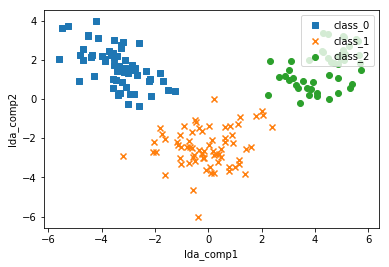

In [362]:
colors =['r','b','g']
markers=['s','x','o']

for i,marker in enumerate(markers):
    x_data=wineDF_lda[wineDF_lda['target']==i]['lda_comp1']
    y_data=wineDF_lda[wineDF_lda['target']==i]['lda_comp2']
    plt.scatter(x_data,y_data,marker=marker, label=wine.target_names[i])
    
plt.legend(loc='upper right')
plt.xlabel('lda_comp1')
plt.ylabel('lda_comp2')
plt.show()

# 3. SVD 실습 (추천 시스템)

## SVD는 추천시스템 중 '협업 필터링 Collaborative Filtering'기법에서 자주 사용되는 방식입니다. <br /> 다음의 과정에 따라서 데이터 전처리 및 SVD를 수행하고 추천결과를 확인해보세요 
     
**다음의 자료에서 많은 도움을 얻었습니다**     
https://lsjsj92.tistory.com/569?category=853217
     
3.1. 원자료를 불러온다     

    1) movies.csv를 데이터프레임으로 불러와서 raw_movies_df라고 저장한다     
    2) ratings.csv를 데이터프레임으로 불러와서 raw_ratings_df라고 저장한다  
    3) raw_ratings_df를 이용하여 피벗된 객체 user_movie_rating_df를 생성한다.     
    index는 userId, column은 movieId, value는 rating으로 한다
    4) user_movie_rating_df의 결측값들을 모두 0으로 변환한다

In [108]:
raw_movies_df=pd.read_csv('movies.csv')
raw_ratings_df=pd.read_csv('ratings.csv')

In [113]:
user_movie_df=pd.merge(raw_ratings_df,raw_movies_df, on='movieId')
user_movie_df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama


In [208]:
user_movie_rating_df=user_movie_df.pivot_table('rating',index='userId',columns='movieId').fillna(0)

In [209]:
user_movie_rating_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3.2. 데이터프레임안의 값들을 X로 추출하여서 표준화를 실시한다
- 표준화는 각 데이터를 데이터가 속한 행의 평균값에서 빼는 방식으로 진행한다 (sklearn의 StandardScaler를 사용하는 것이 아님)
- 표준화된 X를 **X_scaled**라고 저장한다

In [357]:
X_scaled=user_movie_rating_df.sub(user_movie_rating_df.mean(axis=1), axis=0)
X_scaled.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,...,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625,-0.005625
2,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,3.970770,...,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230,-0.029230
3,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,...,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075,-0.020075
4,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,3.902162,...,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838,-0.097838
5,-0.043128,-0.043128,3.956872,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,...,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128,-0.043128


In [358]:
X_scaled.shape

(671, 9066)

3.3. X_scaled를 바탕으로 TruncatedSVD를 시행하여 사용자 평점 예측 객체를 생성한다.
- sklearn 모듈을 사용하지 않고 from scipy.sparse.linalg import svds를 사용합니다
- 사용방법은 인자로 Truncated SVD를 수행하고자 하는 행렬을 첫번째로,
두번째 인자에는 최종 압축되어 산출되는 열의 개수 k를 입력합니다.
- ex) U, sigma, Vt = svds(?, k = 12)
- -> k = 12로 설정 
- 생성된 Truncated SVD객체를 svd_preds_df라고 저장한다
- -> columns는 user_movie_rating_df.columns로 설정

In [359]:
from scipy.sparse.linalg import svds
from scipy.linalg import svd

U, Sigma, Vt = svd(X_scaled)
U_tr,Sigma_tr,Vt_tr=svds(X_scaled,k=12)

In [360]:
print(U.shape,Sigma.shape,Vt.shape)  
print(U_tr.shape,Sigma_tr.shape,Vt_tr.shape)

(671, 671) (671,) (9066, 9066)
(671, 12) (12,) (12, 9066)


In [361]:
svd_preds=np.dot(np.dot(U_tr,np.diag(Sigma_tr)),Vt_tr)
svd_preds_df=pd.DataFrame(svd_preds,columns=user_movie_rating_df.columns)
svd_preds_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,-0.085312,0.016154,-0.019462,-0.011496,-0.034502,0.026746,-0.004911,-0.010054,-0.010845,0.032570,...,-0.009949,-0.009978,0.004853,-0.009882,-0.009570,-0.011300,0.012532,-0.011201,-0.010923,-0.009392
1,1.399222,1.579611,0.500246,0.139048,0.491579,1.078243,0.500489,0.060146,0.267040,1.940801,...,-0.016003,-0.031505,-0.008550,-0.034475,-0.036874,-0.050249,0.002013,-0.030187,-0.029983,-0.002329
2,0.957171,0.376896,-0.019776,0.007369,0.001212,0.121383,-0.077209,0.011558,-0.032613,0.363501,...,-0.017314,-0.015168,-0.034265,-0.020326,-0.026082,-0.023264,-0.046991,-0.005438,-0.006788,-0.025816
3,1.773006,1.072155,0.154364,-0.003007,-0.279551,-0.609791,-0.125658,-0.240918,-0.084591,1.363856,...,-0.071426,-0.125083,-0.043157,-0.079388,-0.063295,-0.133578,-0.008949,-0.117203,-0.114952,-0.031279
4,1.139649,0.881775,0.032870,0.018377,0.559552,-0.202953,0.296796,0.038405,-0.122794,0.491889,...,-0.072252,-0.072485,-0.034064,-0.072220,-0.074018,-0.100581,-0.016784,-0.067156,-0.067743,-0.075880


3.4. 아래에서 제시되는 사용자 정의함수를 이용하여 **user_id = 330**인 고객에게 5개의 영화를 추천해보는 알고리즘을 수행해보세요!

- 인자의 등장순서는 

    1) Truncated SVD를 통해 구해진 svd_preds_df    
    2) 예측하고자 하는 user_id, 번호    
    3) 원래 가지고 있는 영화들의 목록을 담은 raw_movies_df    
    4) 원래 가지고 있는 유저별 영화의 평점 데이터 raw_ratings_df    
    5) 해당 유저에게 추천해주고자 하는 영화의 개수   

https://simonezz.tistory.com/25

In [411]:
def recommend(svd_preds_df, user_id, raw_movies_df, raw_ratings_df, num_recommendations):
    user_row_num=user_id-1
    
    # 사용자 index에 따라 영화 평점이 높은 순으로 정렬
    sorted_user_predictions=svd_preds_df.iloc[user_row_num].sort_values(ascending=False)
    
    # 원본 평점데이터에서 user_id에 해당하는 데이터를 뽑아내기
    user_data=raw_ratings_df[raw_ratings_df.userId==user_id]
    
    # 위에서 뽑은 user_data와 원본데이터를 합친다.
    user_history=user_data.merge(raw_movies_df,on='movieId').sort_values(['rating'],ascending=False)
    
    # 원본 영화데이터에서 사용자가 본 영화데이터를 제외한 데이터 추출
    recommendations=raw_movies_df[raw_movies_df['movieId'].isin(user_history['movieId'])]
    # 사용자의 영화 평점이 높은 순으로 정렬된 데이터와 위 recommendation을 merge
    recommendations=recommendations.merge(pd.DataFrame(sorted_user_predictions).reset_index(),on='movieId')
    
    # 컬럼이름을 바꾸고 정렬해서 return
    recommendations=recommendations.rename(columns={user_row_num: 'Predictions'}).sort_values('Predictions',ascending=False)
    
    return user_history, recommendations

In [412]:
user_history, predictions = recommend(svd_preds_df,330, raw_movies_df, raw_ratings_df, 5)
user_history.head()

,userId,movieId,rating,timestamp,title,genres
47,330,1094,5.0,948577200,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,948577039,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,948577164,Schindler's List (1993),Drama|War
45,330,1035,5.0,948574126,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,948575236,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [413]:
predictions.head()

,movieId,title,genres,Predictions
22,318,"Shawshank Redemption, The (1994)",Crime|Drama,2.042527
36,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,1.891536
34,527,Schindler's List (1993),Drama|War,1.627316
29,457,"Fugitive, The (1993)",Thriller,1.625933
10,150,Apollo 13 (1995),Adventure|Drama|IMAX,1.593873


## 답

In [25]:
#생성된 유저의 이전 평점 기록
user_history.head(5)

,userId,movieId,rating,timestamp,title,genres
47,330,1094,5.0,948577200,"Crying Game, The (1992)",Drama|Romance|Thriller
14,330,213,5.0,948577039,Burnt by the Sun (Utomlyonnye solntsem) (1994),Drama
34,330,527,5.0,948577164,Schindler's List (1993),Drama|War
45,330,1035,5.0,948574126,"Sound of Music, The (1965)",Musical|Romance
48,330,1172,5.0,948575236,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [27]:
#예측된 유저의 영화추천 목록
recommendations.head(5)

,movieId,title,genres,Predictions
246,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,2.023774
294,356,Forrest Gump (1994),Comedy|Drama|Romance|War,1.736524
497,608,Fargo (1996),Comedy|Crime|Drama|Thriller,1.489821
487,590,Dances with Wolves (1990),Adventure|Drama|Western,1.472671
316,380,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,1.240356
